In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Visualizando os dados

In [2]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Distribuição de Sobreviventes')

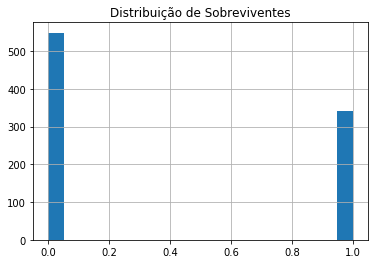

In [3]:
##Distribuição de sobreviventes
# Mais pessoas morreram do que sobreviveram(desbalanceado)
train.Survived.hist(bins=20)
plt.title("Distribuição de Sobreviventes")

Text(0.5, 1.0, 'Distribuição de Sexo')

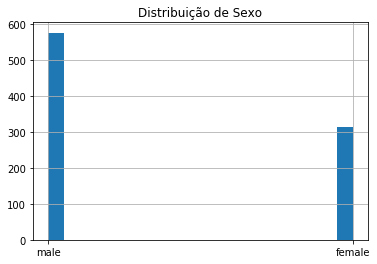

In [4]:
##Distribuição de sexo
# Mais homens que mulheres
# Como a maioria morreu e a maioria dos dados de treino são homens,
# pode haver uma relação entre ser homem e morrer.
train.Sex.hist(bins=20)
plt.title("Distribuição de Sexo")

Text(0.5, 1.0, 'Distribuição de Classe')

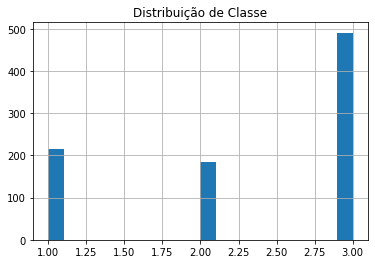

In [5]:
## Distribuição de Classe
# Maioria é de terceira classe(Pode haver uma relação)
train.Pclass.hist(bins=20)
plt.title("Distribuição de Classe")

Text(0.5, 1.0, 'Distribuição de Idade')

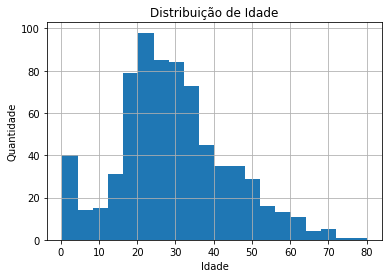

In [6]:
## Distribuição de Idade
# Maioria de meia idade
train.Age.hist(bins=20)
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Distribuição de Idade")

Text(0.5, 1.0, 'Distribuição de Parentes')

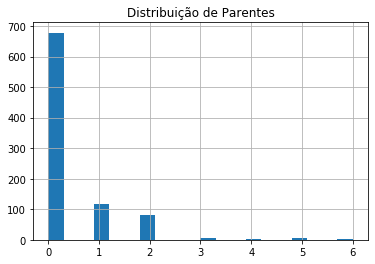

In [7]:
## Distribuição de Parentes
train.Parch.hist(bins=20)
plt.title("Distribuição de Parentes")

In [8]:
## Exploração de dados
#  Prova que sobrevivem menos homens que mulheres
train[["Survived", "Sex"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
## Exploração de dados
#  Prova que mesmo as pessoas sendo de maioria da terceira classe,
#  elas foram a que menos sobreviveram
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
## Exploração de dados
#  Numero de parentes embarcados
#  Intuitivamente parece relevante
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [11]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
## Dropando valores intuitivamente considerados desnecessários
train = train.drop(["Ticket"], axis=1)
test = test.drop(["Ticket"], axis=1)

## Engenharia de dados

Porcentagem de CabinBool = 1 sobreviventes: 66.66666666666666
Porcentagem de CabinBool = 0 sobreviventes: 29.985443959243085


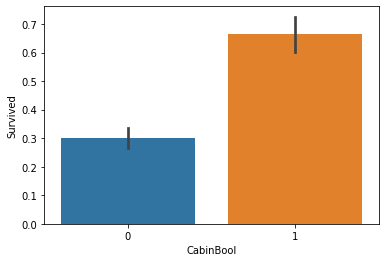

In [13]:
##Convertendo valores categóricos
##Convertendo  Cabin
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))


print("Porcentagem de CabinBool = 1 sobreviventes:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Porcentagem de CabinBool = 0 sobreviventes:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()
#Pessoas com numero na cabine tem mais chances de sobreviver. (66.6% vs 29.9%)
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [14]:
##Tratando nomes usando o prefixo
data_title = [i.split(",")[1].split(".")[0].strip() for i in train["Name"]]
train["Title"] = pd.Series(data_title)
tdata_title = [i.split(",")[1].split(".")[0].strip() for i in test["Name"]]
test["Title"] = pd.Series(tdata_title)
test["Title"].head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

In [15]:
##Tratando os nomes
train["Title"] = train["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train["Title"] = train["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
train["Title"] = train["Title"].astype(int)
test["Title"] = test["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test["Title"] = test["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
test["Title"] = test["Title"].astype(int)

train.drop(labels = ["Name"], axis = 1, inplace = True)
test.drop(labels = ["Name"], axis = 1, inplace = True)

In [16]:
##Convertendo valores categóricos
##Fazendo o one hot encoder
newdtrain = pd.get_dummies(train)
newdtest = pd.get_dummies(test)
newdtrain.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinBool,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,2,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,1,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,1,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,2,0,1,0,0,1


In [17]:
##Agrupando os dados
# Tamanho da familia
newdtrain["Fsize"] = newdtrain["SibSp"] + newdtrain["Parch"] + 1
newdtest["Fsize"] = newdtest["SibSp"] + newdtest["Parch"] + 1

In [18]:
newdtrain["Single"] = newdtrain["Fsize"].map(lambda x: 1 if x == 1 else 0)
newdtrain["Small"] = newdtrain["Fsize"].map(lambda x: 1 if x == 2 else 0)
newdtrain["Med"] = newdtrain["Fsize"].map(lambda x: 1 if 3 <= x <= 4 else 0)
newdtrain["Large"] = newdtrain["Fsize"].map(lambda x: 1 if x >= 5 else 0)

newdtest["Single"] = newdtest["Fsize"].map(lambda x: 1 if x == 1 else 0)
newdtest["Small"] = newdtest["Fsize"].map(lambda x: 1 if x == 2 else 0)
newdtest["Med"] = newdtest["Fsize"].map(lambda x: 1 if 3 <= x <= 4 else 0)
newdtest["Large"] = newdtest["Fsize"].map(lambda x: 1 if x >= 5 else 0)

In [19]:
newdtrain.isnull().sum().sort_values(ascending=False).head(10)

Age           177
Large           0
Title           0
Survived        0
Pclass          0
SibSp           0
Parch           0
Fare            0
CabinBool       0
Sex_female      0
dtype: int64

# Tratando os valores missing da idade usando média

In [20]:

newdtrain["Age"].fillna(newdtrain["Age"].mean(), inplace=True)
newdtest["Age"].fillna(newdtest["Age"].mean(), inplace=True)

In [21]:
## Convertendo idade para um intervalo
newdtrain['AgeBand'] = pd.cut(newdtrain['Age'], 5)
newdtest['AgeBand'] = pd.cut(newdtest['Age'], 5)
newdtrain[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)



,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [22]:
newdtrain.loc[newdtrain['Age'] <= 16, 'Age'] = 0
newdtrain.loc[(newdtrain['Age'] > 16) & (newdtrain['Age'] <= 32), 'Age'] = 1
newdtrain.loc[(newdtrain['Age'] > 32) & (newdtrain['Age'] <= 48), 'Age'] = 2
newdtrain.loc[(newdtrain['Age'] > 48) & (newdtrain['Age'] <= 64), 'Age'] = 3
newdtrain.loc[ newdtrain['Age'] > 64, 'Age'] = 4

newdtest.loc[newdtest['Age'] <= 16, 'Age'] = 0
newdtest.loc[(newdtest['Age'] > 16) & (newdtest['Age'] <= 32), 'Age'] = 1
newdtest.loc[(newdtest['Age'] > 32) & (newdtest['Age'] <= 48), 'Age'] = 2
newdtest.loc[(newdtest['Age'] > 48) & (newdtest['Age'] <= 64), 'Age'] = 3
newdtest.loc[ newdtest['Age'] > 64, 'Age'] = 4 


In [23]:
newdtrain = newdtrain.drop(['AgeBand'], axis=1)
newdtest = newdtest.drop(['AgeBand'], axis=1)

In [24]:
## Convertendo valores FareBand
newdtrain['FareBand'] = pd.qcut(newdtrain['Fare'], 4)
newdtest['FareBand'] = pd.qcut(newdtest['Fare'], 4)
newdtrain[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [25]:
newdtrain.loc[ newdtrain['Fare'] <= 7.91, 'Fare'] = 0
newdtrain.loc[(newdtrain['Fare'] > 7.91) & (newdtrain['Fare'] <= 14.454), 'Fare'] = 1
newdtrain.loc[(newdtrain['Fare'] > 14.454) & (newdtrain['Fare'] <= 31.0), 'Fare'] = 2
newdtrain.loc[newdtrain['Fare'] > 31.0, 'Fare'] = 3

newdtest.loc[ newdtest['Fare'] <= 7.91, 'Fare'] = 0
newdtest.loc[(newdtest['Fare'] > 7.91) & (newdtest['Fare'] <= 14.454), 'Fare'] = 1
newdtest.loc[(newdtest['Fare'] > 14.454) & (newdtest['Fare'] <= 31.0), 'Fare'] = 2
newdtest.loc[newdtest['Fare'] > 31.0, 'Fare'] = 3


In [26]:
newdtrain = newdtrain.drop(['FareBand'], axis=1)

newdtest = newdtest.drop(['FareBand'], axis=1)

In [27]:
newdtest.isnull().sum().sort_values(ascending=False).head(10)

Fare          1
Large         0
Med           0
Pclass        0
Age           0
SibSp         0
Parch         0
CabinBool     0
Title         0
Sex_female    0
dtype: int64

In [28]:
newdtest["Fare"].fillna(newdtest["Fare"].mean(), inplace=True)


In [29]:
X = newdtrain.drop("Survived", axis=1)
y = newdtrain["Survived"]

## Visualizando as correlacões negativas e positivas

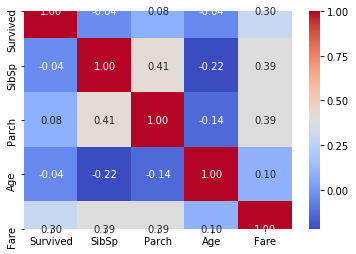

In [30]:
## Correlação de dados
g = sns.heatmap(newdtrain[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot=True, fmt=".2f", cmap = "coolwarm", )

## Representação do modelo

In [31]:
## Modelo de predição
# Árvore de decisão
# Overfitting
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 0)
tree.fit(X, y)
tree.score(X, y)

0.9337822671156004

In [32]:
## Modelo de predição
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
Xtest = newdtest

In [33]:
Xtrain, Xval, Ytrain, Yval = train_test_split(X, y, test_size=0.2, random_state=True)


In [34]:
model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           random_state=42)
model.fit(Xtrain, Ytrain)
tree.fit(Xtrain, Ytrain)
print(model.score(Xtrain, Ytrain), model.score(Xval, Yval))

0.8441011235955056 0.8100558659217877


In [35]:
from sklearn.metrics import accuracy_score
Yprediction = model.predict(Xval)
accuracy_score(Yval, Yprediction)

0.8100558659217877

## Exportando os resultados

In [36]:
submission = pd.DataFrame()

submission["PassengerId"] = Xtest["PassengerId"]
submission["Survived"] = model.predict(Xtest)
submission.to_csv("submission.csv", index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
